In [1]:
import numpy
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision.transforms import ToTensor
from torch import nn
from torch.utils.data import DataLoader

In [2]:
data = torchvision.datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = torchvision.datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

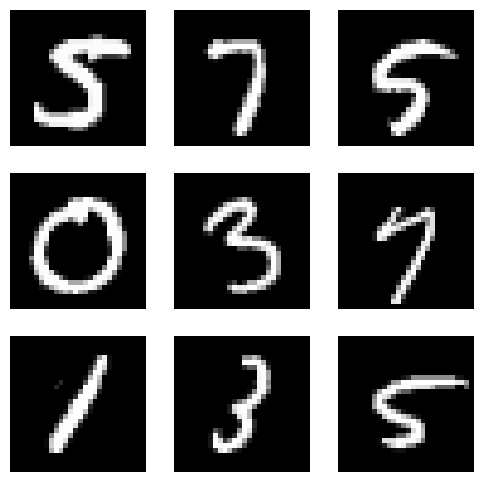

In [4]:
figure = plt.figure(figsize=(6,6))
cols, rows = 3, 3
for i in range(1, cols*rows + 1):
    sample_index = torch.randint(len(data), size=(1,)).item()
    img, label = data[sample_index]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [5]:
data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [40]:
class VarAutoencoder(nn.Module):

    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 36),
            nn.ReLU(),
            nn.Linear(36, 18),
            nn.ReLU()
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(9, 18),
            nn.ReLU(),
            nn.Linear(18, 36),
            nn.ReLU(),
            nn.Linear(36, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )
        self.linear1 = nn.Linear(18, 9)
        self.linear2 = nn.Linear(18, 9)
        self.G = torch.distributions.Normal(0, 1)

    def reparametrize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        return mu + std*self.G.sample(mu.shape)

    def forward(self, x):
        x = self.encoder(x)
        mu = self.linear1(x)
        logvar = self.linear2(x)
        z = self.reparametrize(mu, logvar)
        output = self.decoder(z)
        return output, mu, logvar

In [53]:
learning_rate = 1e-4
batch_size = 32

VAE = VarAutoencoder()

In [54]:
loss_1 = nn.MSELoss()

In [55]:
def loss_2(mu, logvar):
    return torch.mean(-0.5 * torch.sum(1 + logvar - mu ** 2 - torch.exp(logvar), dim = 1), dim = 0).sum()

In [56]:
#optimizer = torch.optim.SGD(ae.parameters(), lr=learning_rate, momentum=momentum)
optimizer = torch.optim.Adam(VAE.parameters(),
                             lr = learning_rate,
                             weight_decay = 1e-8)
data_loader = DataLoader(data, batch_size=batch_size, shuffle=True)

Epoch  0
loss1 tensor(0.2315) loss2 tensor(0.2055)
[ 0 16 22  1]


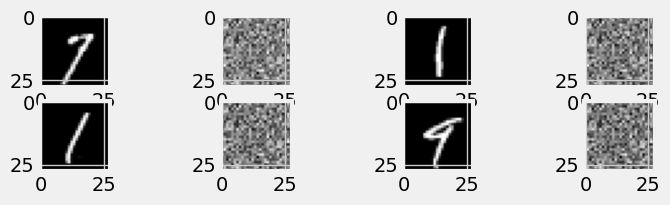

2.3153815269470215
Epoch  1
loss1 tensor(0.0680) loss2 tensor(4.8855)
[26 13 11 13]


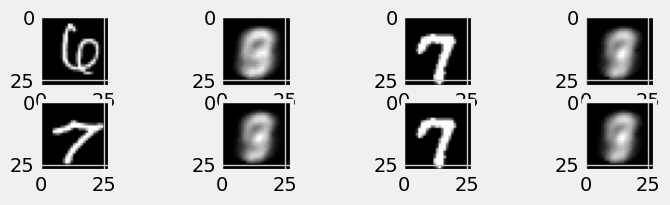

0.6844953894615173
Epoch  2
loss1 tensor(0.0522) loss2 tensor(8.2782)
[21 10 27  2]


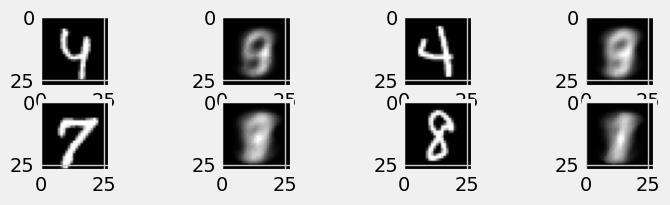

0.5300303101539612
Epoch  3
loss1 tensor(0.0564) loss2 tensor(10.2624)
[13 22  8 25]


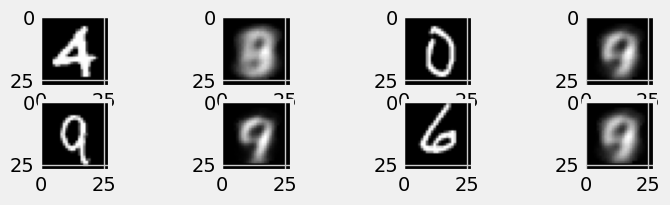

0.5740290284156799
Epoch  4
loss1 tensor(0.0519) loss2 tensor(12.8414)
[29 26  6 16]


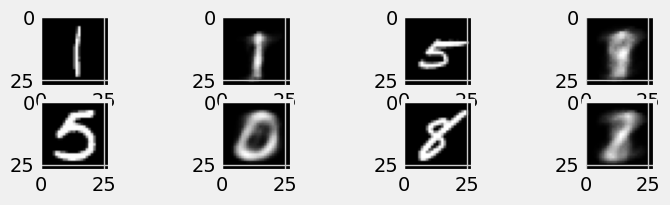

0.5315088033676147
Epoch  5
loss1 tensor(0.0479) loss2 tensor(12.5376)
[21 20  0 16]


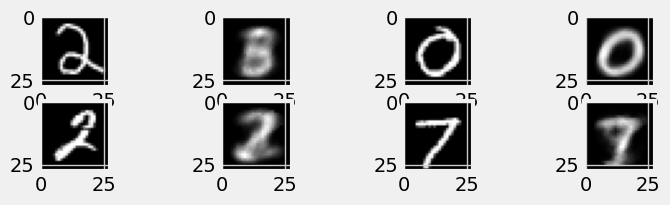

0.49106258153915405
Epoch  6
loss1 tensor(0.0455) loss2 tensor(18.3862)
[12 13 11  1]


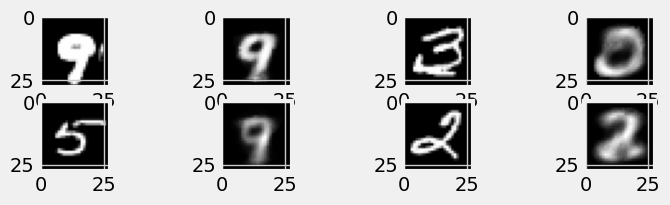

0.47316238284111023
Epoch  7
loss1 tensor(0.0350) loss2 tensor(17.5044)
[ 2 10  6 28]


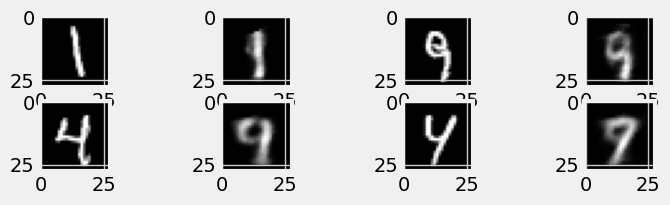

0.36781013011932373
Epoch  8
loss1 tensor(0.0436) loss2 tensor(16.7074)
[30 18 23 25]


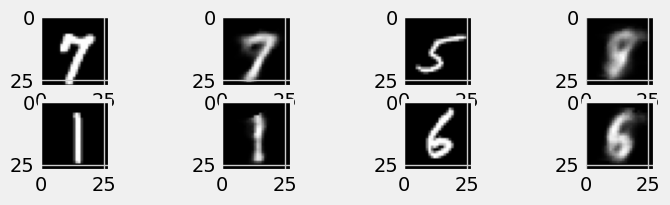

0.4526592493057251
Epoch  9
loss1 tensor(0.0396) loss2 tensor(17.3773)
[14 28 16  1]


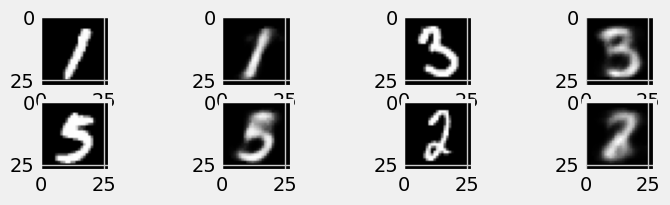

0.4131125211715698
Epoch  10
loss1 tensor(0.0398) loss2 tensor(17.3721)
[29 25 17 19]


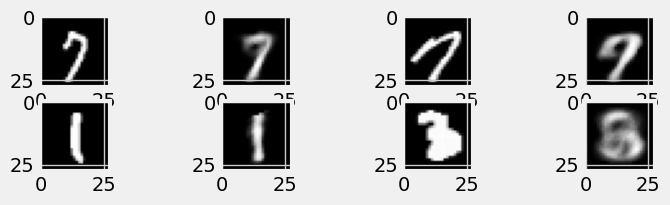

0.414887011051178
Epoch  11
loss1 tensor(0.0408) loss2 tensor(15.5197)
[14  2 10 14]


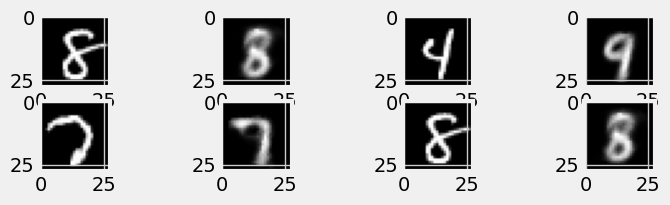

0.423362135887146
Epoch  12
loss1 tensor(0.0367) loss2 tensor(18.1582)
[31 16 16  6]


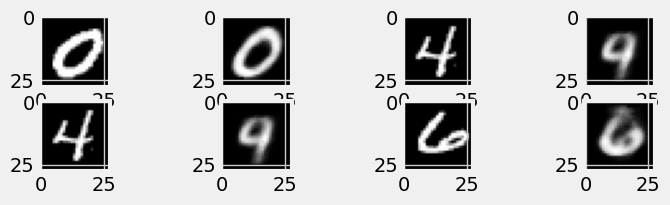

0.3851076066493988
Epoch  13
loss1 tensor(0.0363) loss2 tensor(18.1944)
[21 22 10 14]


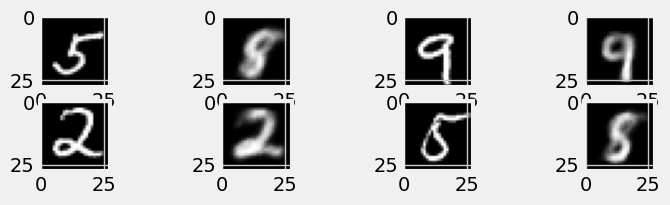

0.3815082907676697
Epoch  14
loss1 tensor(0.0368) loss2 tensor(19.3415)
[ 1 17  9 14]


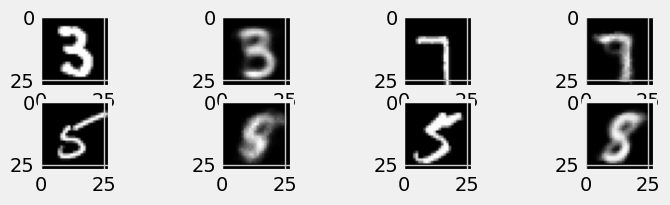

0.3871035873889923
Epoch  15
loss1 tensor(0.0316) loss2 tensor(21.1727)
[ 2 16 29 14]


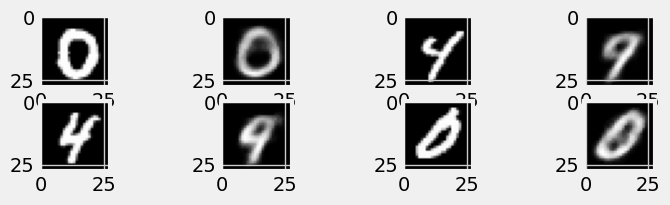

0.3374626040458679
Epoch  16
loss1 tensor(0.0345) loss2 tensor(20.6952)
[ 7 15 16  1]


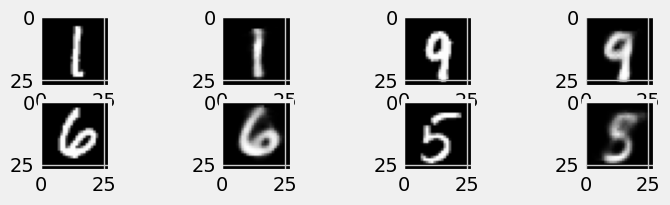

0.36540427803993225
Epoch  17
loss1 tensor(0.0324) loss2 tensor(20.2476)
[ 0 13 11 26]


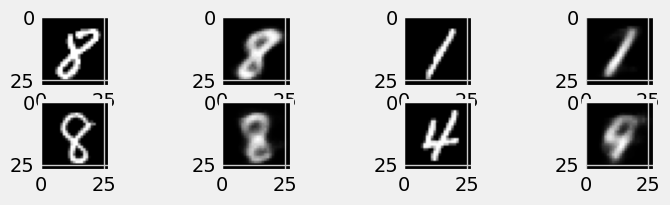

0.34384453296661377
Epoch  18
loss1 tensor(0.0295) loss2 tensor(21.7660)
[30 25 20 19]


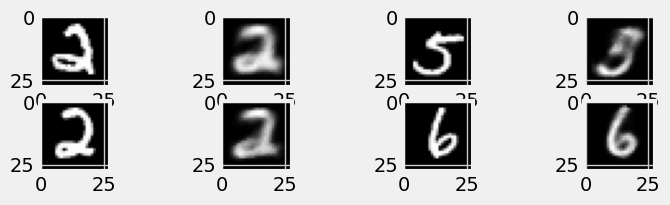

0.31724536418914795
Epoch  19
loss1 tensor(0.0307) loss2 tensor(20.3545)
[ 3 30 28 10]


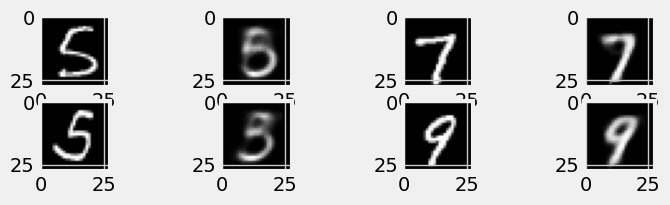

0.3270679712295532
Epoch  20
loss1 tensor(0.0380) loss2 tensor(19.0654)
[ 7  3 31 17]


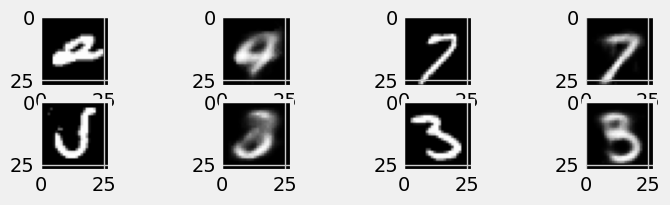

0.39875367283821106
Epoch  21
loss1 tensor(0.0333) loss2 tensor(20.7511)
[24  0 25 17]


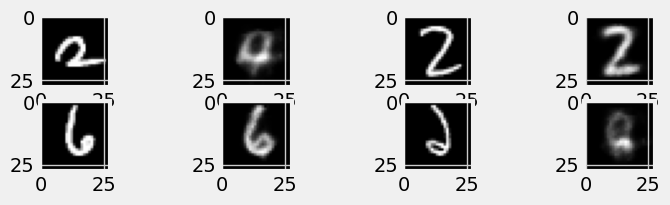

0.35423383116722107
Epoch  22
loss1 tensor(0.0326) loss2 tensor(20.8458)
[29 19  0 25]


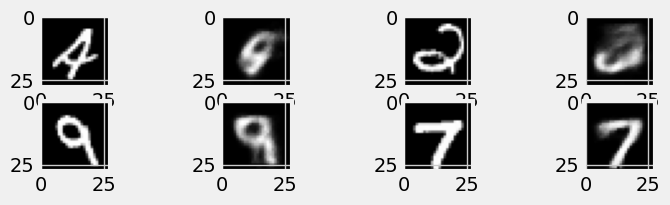

0.347017765045166
Epoch  23
loss1 tensor(0.0307) loss2 tensor(20.0858)
[27  2 20 31]


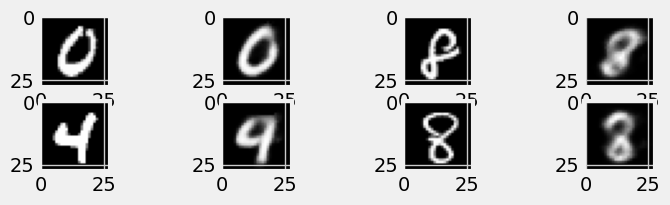

0.32712528109550476
Epoch  24
loss1 tensor(0.0265) loss2 tensor(20.7737)
[18 22  5 15]


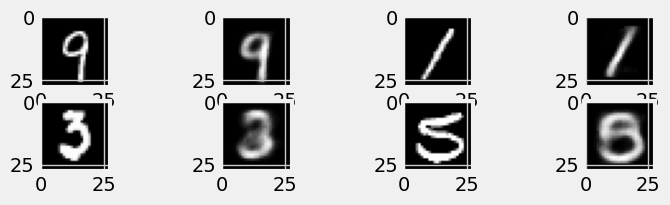

0.28612595796585083
Epoch  25
loss1 tensor(0.0308) loss2 tensor(21.4971)
[ 0  0  2 24]


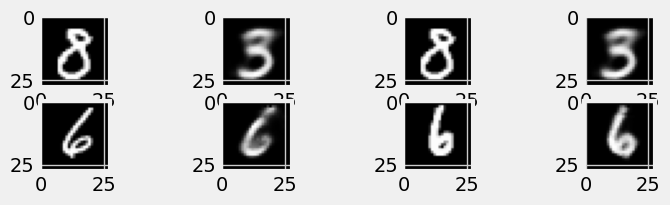

0.32911568880081177
Epoch  26
loss1 tensor(0.0320) loss2 tensor(20.4768)
[26 24 15 26]


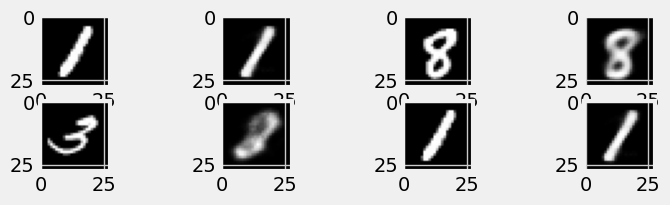

0.34013354778289795
Epoch  27
loss1 tensor(0.0313) loss2 tensor(19.3559)
[ 5 20 28  8]


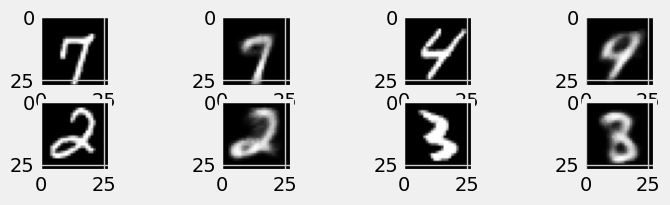

0.3324429392814636
Epoch  28
loss1 tensor(0.0282) loss2 tensor(19.9292)
[ 1 31 28  4]


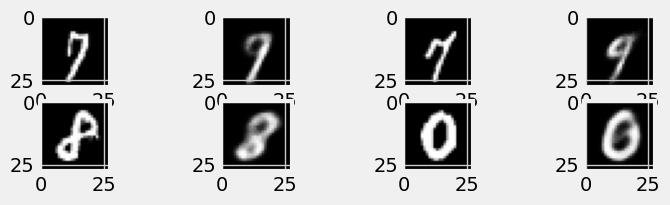

0.3020039200782776
Epoch  29
loss1 tensor(0.0298) loss2 tensor(21.0600)
[31 18 28 26]


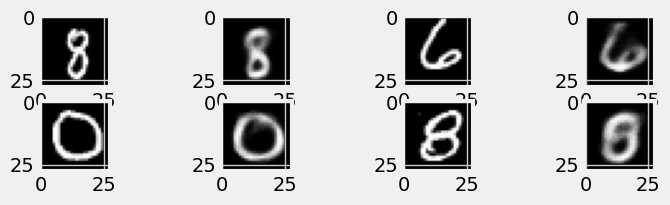

0.31909751892089844


In [57]:
# Training loop
epochs = 30
losses = []
beta1 = 10
beta2 = 0.001
for epoch in range(epochs):
    plot = True

    VAE.train()
    for (image, _) in data_loader:

        # Reshape image for input
        image = image.reshape(-1, 784)

        # Feed through the network
        reconstruction, mu, logvar = VAE(image)
        # Calculate loss function
        loss = beta1*loss_1(reconstruction, image) + beta2*loss_2(mu, logvar)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if plot==True:
            fig = plt.figure(figsize=(8,4))
            print('Epoch ', epoch)
            with torch.no_grad():
                print('loss1', loss_1(reconstruction, image), 'loss2', loss_2(mu, logvar))
                recon_plot = reconstruction.reshape(-1, 28, 28)
                images_plot = image.reshape(-1, 28, 28)
                indices = numpy.random.choice(32, 4)
                print(indices)
                for i, ind in enumerate(indices):
                    ax1 = fig.add_subplot(4,4,2*i+1)
                    ax1.imshow(images_plot[ind], cmap='gray')
                    ax2 = fig.add_subplot(4,4,2*i+2)
                    ax2.imshow(recon_plot[ind], cmap='gray')
            
            plt.show()
            print(losses[-1])
            plot=False

        

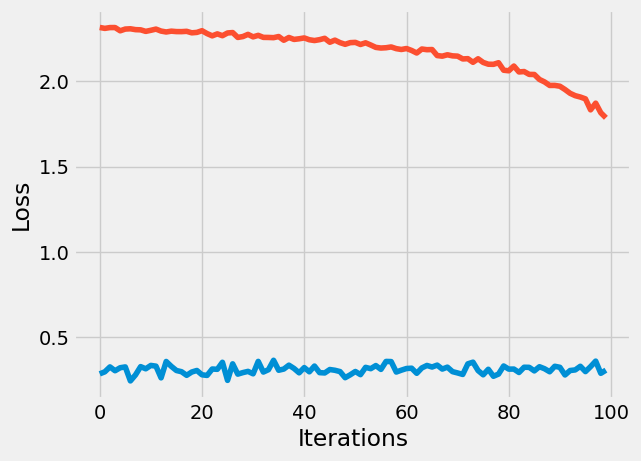

In [58]:
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses[-100:])
plt.plot(losses[:100])

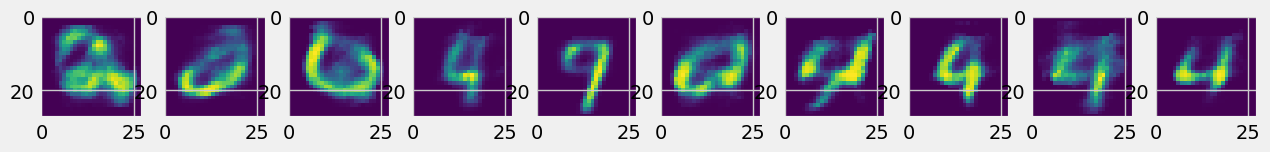

In [64]:
# Decoding randomly generated latent space points

sample_index = numpy.random.randint(len(data))
img, label = data[sample_index]
fig = plt.figure(figsize=(14,10))
with torch.no_grad():
    for i in range(10):
        z = VAE.encoder(img.reshape(-1, 784))
        z = VAE.linear1(z)
        #print(z)
        z_rand = torch.distributions.Normal(0,1).sample(z.shape)
        x_rand = VAE.decoder(z_rand)
        ax = fig.add_subplot(1,10,i+1)
        ax.imshow(x_rand.squeeze().reshape(28,28))
plt.show()